<a href="https://colab.research.google.com/github/algoritmosdenegociacion/modulo3/blob/main/M3_L3_Backtesting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmos de Negociación basados en Machine Learning - Módulo 3
- Sergio Andrés Cabrales, Ph.D., Universidad de los Andes 
- Juan Pablo Cortés, T.A., Universidad de los Andes

https://github.com/algoritmosdenegociacion/

## 1. Carga de librerías, funciones y APIs necesarias.


#### 1.1. Se cargan las librerías necesarias

In [ ]:
# Funciones numéricas adicionales
import numpy as np

# Lectura de datos y manejo de Data-sets
import pandas as pd

# Gráficos 
import matplotlib.pyplot as plt

## 2. Obtención de datos históricos


#### 2.1. Se cargan los datos - FRED


In [ ]:
# Importar datos de la FRED (Federal Reserve Economic Data) - Federal Reserve Bank of St. Louis
import pandas_datareader as pdr

https://fred.stlouisfed.org/

In [ ]:
# Descargamos datos de petróleo referencia BRENT
# BRENT es DCOILBRENTEU
# WTI es DCOILWTICO
df = pdr.get_data_fred('DCOILBRENTEU', start='2016-01-01', end='2021-01-01')

# Renombramos la columna como Close
df.columns = ['Close']

# Quitamos los datos vacíos
df = df.dropna()

df

,Close
DATE,
2016-01-04,36.28
2016-01-05,35.56
2016-01-06,33.89
2016-01-07,33.57
2016-01-08,31.67
...,...
2020-12-24,50.88
2020-12-28,50.88
2020-12-29,50.44


## 3. Calcular la media móvil exponencial (EMA)

#### 3.1. Agregar al dataset las EMAs de 5 y 20 días

In [ ]:
# media móvil exponencial (EMA) 5 días
df['EMA_short'] = df['Close'].ewm(span=5, adjust=False).mean()

# media móvil exponencial (EMA) 20 días
df['EMA_long'] = df['Close'].ewm(span=20, adjust=False).mean()

df

,Close,EMA_short,EMA_long
DATE,,,
2016-01-04,36.28,36.280000,36.280000
2016-01-05,35.56,36.040000,36.211429
2016-01-06,33.89,35.323333,35.990340
2016-01-07,33.57,34.738889,35.759832
2016-01-08,31.67,33.715926,35.370324
...,...,...,...
2020-12-24,50.88,50.792761,49.228966
2020-12-28,50.88,50.821840,49.386208
2020-12-29,50.44,50.694560,49.486569


#### 3.2. Gráfico de los precios y las EMAs

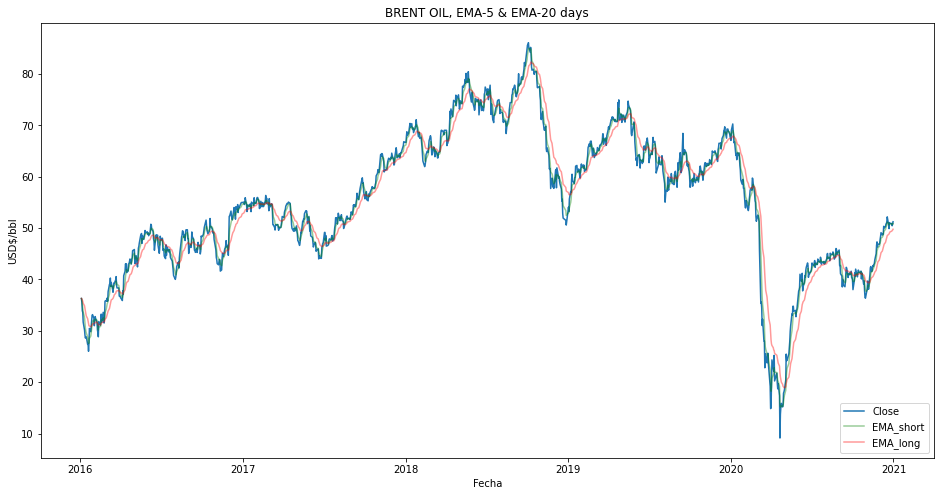

In [ ]:
# Gráfico de la serie de precios y sus medias móviles exponenciales.
plt.figure(figsize=(16,8))
plt.title('BRENT OIL, EMA-5 & EMA-20 days')
plt.plot(df['Close'])
plt.plot(df['EMA_short'], color='green', alpha=0.4)
plt.plot(df['EMA_long'], color='red', alpha=0.4)
plt.xlabel('Fecha')
plt.ylabel('USD$/bbl')
plt.legend(['Close', 'EMA_short', 'EMA_long'], loc = 'lower right')
plt.show()

## 4. Obtención de señales de compra y venta

#### 4.1. Estrategia para obtener las señales

In [ ]:
# Número de datos
N = len(df)

# Crea una lista para almacenar las señales
  # -1 vender
  # 0 mantener
  # 1 comprar
signals = [0]

# Recorre la ventana de tiempo a partir del día 1
for i in range(1, N):

  # Obtiene las medias móviles exponenciales del día i
  short = df['EMA_short'][i]
  long = df['EMA_long'][i]

  # Obtiene las medias móviles exponenciales del día i-1
  p_short = df['EMA_short'][i-1]
  p_long = df['EMA_long'][i-1]

  # Compruebe si la EMA a corto plazo cruza por encima de la EMA a largo plazo
  if p_short < p_long and short >= long:
    signals.append(1)

  # Compruebe si la EMA a corto plazo cruza por debajo de la EMA a largo plazo
  elif p_short > p_long and short <= long:
    signals.append(-1)

  # Cuando las medias móviles exponenciales no se cruzan
  else:
    signals.append(0)

df['Signals'] = signals
df

,Close,EMA_short,EMA_long,Signals
DATE,,,,
2016-01-04,36.28,36.280000,36.280000,0
2016-01-05,35.56,36.040000,36.211429,0
2016-01-06,33.89,35.323333,35.990340,0
2016-01-07,33.57,34.738889,35.759832,0
2016-01-08,31.67,33.715926,35.370324,0
...,...,...,...,...
2020-12-24,50.88,50.792761,49.228966,0
2020-12-28,50.88,50.821840,49.386208,0
2020-12-29,50.44,50.694560,49.486569,0


#### 4.2. Gráfico de las señales de trading

In [ ]:
df['Buy'] = np.where(df['Signals']==1, df['Close'], np.nan)
df['Sell'] = np.where(df['Signals']==-1, df['Close'], np.nan)
df

,Close,EMA_short,EMA_long,Signals,Buy,Sell
DATE,,,,,,
2016-01-04,36.28,36.280000,36.280000,0,NaN,NaN
2016-01-05,35.56,36.040000,36.211429,0,NaN,NaN
2016-01-06,33.89,35.323333,35.990340,0,NaN,NaN
2016-01-07,33.57,34.738889,35.759832,0,NaN,NaN
2016-01-08,31.67,33.715926,35.370324,0,NaN,NaN
...,...,...,...,...,...,...
2020-12-24,50.88,50.792761,49.228966,0,NaN,NaN
2020-12-28,50.88,50.821840,49.386208,0,NaN,NaN
2020-12-29,50.44,50.694560,49.486569,0,NaN,NaN


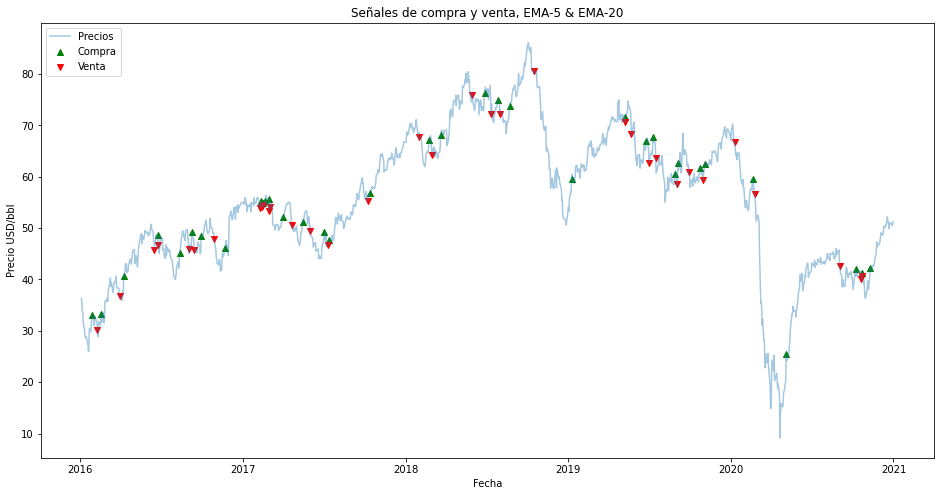

In [ ]:
# Mostrar visualmente las señales de compra y venta de acciones
plt.figure(figsize=(16,8))
plt.plot(df['Close'], alpha = 0.4, label = 'Precios')

plt.scatter(df.index, df['Buy'], color='green', marker='^', label = 'Compra')
plt.scatter(df.index, df['Sell'], color = 'red', marker='v', label = 'Venta')

plt.title('Señales de compra y venta, EMA-5 & EMA-20')
plt.xlabel('Fecha')
plt.ylabel('Precio USD/bbl')
plt.legend(loc='upper left')
plt.show()

## 5. Backtesting - Calcular el desempeño de una estrategia

#### 5.1. Cálculo de capital a lo largo de la venta de tiempo

In [ ]:
# Número de datos
N = len(df)

# Crea una lista para almacenar el capital
# Emezamos con 100 USD
equity = [100]

# Take Profit al 3% y Stop Loss al 1%
TP = 0.03
SL = 0.01

pos = 0
price = -1

# Recorre la ventana de tiempo a partir del día 1
for i in range(1, N):
  
  equity.append( equity[i-1] )

  if pos == 1:
    
    if df['Close'][i] >= price*(1 + TP):
      equity[i] *= 1 + TP
      pos = 0
    
    elif df['Close'][i] <= price*(1 - SL):
      equity[i] *= 1 - SL
      pos = 0

  elif pos == -1:

    if df['Close'][i] <= price*(1 - TP):
      equity[i] *= 1 + TP
      pos = 0
    
    elif df['Close'][i] >= price*(1 + SL):
      equity[i] *= 1 - SL
      pos = 0

  else:

    if df['Signals'][i] != 0:
      pos = df['Signals'][i]
      price = df['Close'][i]

df['Equity'] = equity


#### 5.2. Gráfico del capital

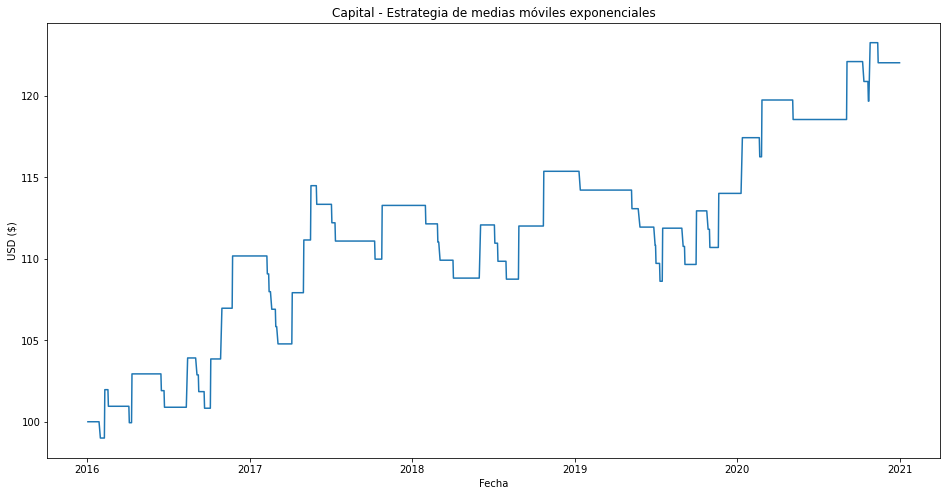

In [ ]:
# Mostrar visualmente el equity a lo largo de la ventana de tiempo
plt.figure(figsize=(16,8))
plt.plot(df['Equity'])

plt.title('Capital - Estrategia de medias móviles exponenciales')
plt.xlabel('Fecha')
plt.ylabel('USD ($)')
plt.show()

#### 5.3. Comparación con un portafolio de mercado

In [ ]:
pip install yfinance

     |████████████████████████████████| 6.3 MB 7.6 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=90517c3028b08f162798597d4a686a6df99fa46ea888004c69c79bd0b57145e4
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import yfinance as yfin

In [ ]:
mkt = yfin.download('^GSPC', start='2016-01-01', end='2021-01-01')
mkt

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,2038.199951,2038.199951,1989.680054,2012.660034,2012.660034,4304880000
2016-01-05,2013.780029,2021.939941,2004.170044,2016.709961,2016.709961,3706620000
2016-01-06,2011.709961,2011.709961,1979.050049,1990.260010,1990.260010,4336660000
2016-01-07,1985.319946,1985.319946,1938.829956,1943.089966,1943.089966,5076590000
2016-01-08,1945.969971,1960.400024,1918.459961,1922.030029,1922.030029,4664940000
...,...,...,...,...,...,...
2020-12-24,3694.030029,3703.820068,3689.320068,3703.060059,3703.060059,1885090000
2020-12-28,3723.030029,3740.510010,3723.030029,3735.360107,3735.360107,3527460000
2020-12-29,3750.010010,3756.120117,3723.310059,3727.040039,3727.040039,3387030000


In [ ]:
mkt['Close_100'] = (100/mkt['Close'][0])*mkt['Close']
mkt

,Open,High,Low,Close,Adj Close,Volume,Close_100
Date,,,,,,,
2016-01-04,2038.199951,2038.199951,1989.680054,2012.660034,2012.660034,4304880000,100.000000
2016-01-05,2013.780029,2021.939941,2004.170044,2016.709961,2016.709961,3706620000,100.201223
2016-01-06,2011.709961,2011.709961,1979.050049,1990.260010,1990.260010,4336660000,98.887044
2016-01-07,1985.319946,1985.319946,1938.829956,1943.089966,1943.089966,5076590000,96.543377
2016-01-08,1945.969971,1960.400024,1918.459961,1922.030029,1922.030029,4664940000,95.497004
...,...,...,...,...,...,...,...
2020-12-24,3694.030029,3703.820068,3689.320068,3703.060059,3703.060059,1885090000,183.988354
2020-12-28,3723.030029,3740.510010,3723.030029,3735.360107,3735.360107,3527460000,185.593197
2020-12-29,3750.010010,3756.120117,3723.310059,3727.040039,3727.040039,3387030000,185.179811


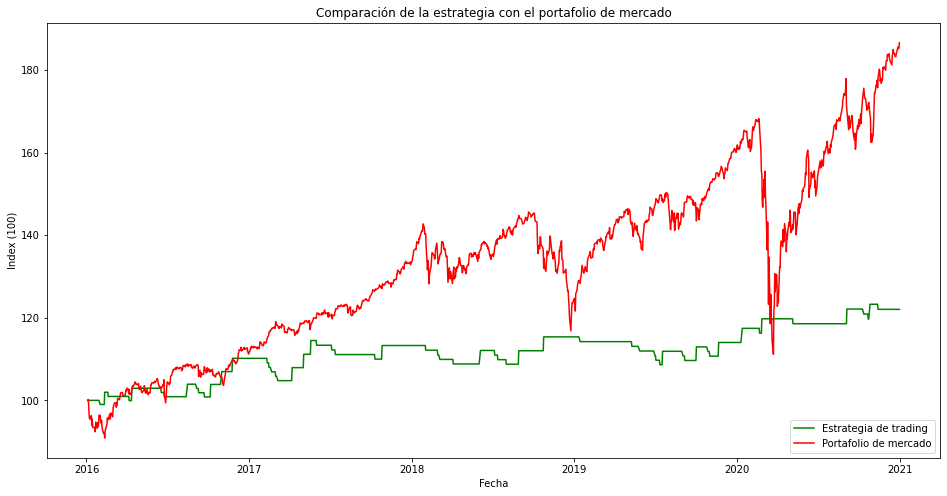

In [ ]:
# Comparación de la estrategia con el portafolio de mercado
plt.figure(figsize=(16,8))
plt.plot(df['Equity'], color = 'green', label = 'Estrategia de trading')
plt.plot(mkt['Close_100'], color = 'red', label = 'Portafolio de mercado')

plt.title('Comparación de la estrategia con el portafolio de mercado')
plt.xlabel('Fecha')
plt.ylabel('Index (100)')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Desempeño de la estrategia planteada
df['Log Returns'] = np.log(df['Equity']).diff()

ret = 252*df['Log Returns'].mean()
print('Retorno esperado anulizado: {:.4f}'.format(ret))

vol = np.sqrt(252)*df['Log Returns'].std()
print('Volatilidad anulizada: {:.4f}'.format(vol))

sharpe_ratio = (ret - 0.01)/vol
print('Sharpe Ratio: {:.4f}'.format(sharpe_ratio))

Retorno esperado anulizado: 0.0394
Volatilidad anulizada: 0.0651
Sharpe Ratio: 0.4520


In [ ]:
# Desempeño del portafolio de mercado
mkt['Log Returns'] = np.log(mkt['Close']).diff()

ret = 252*mkt['Log Returns'].mean()
print('Retorno esperado anulizado: {:.4f}'.format(ret))

vol = np.sqrt(252)*mkt['Log Returns'].std()
print('Volatilidad anulizada: {:.4f}'.format(vol))

sharpe_ratio = (ret - 0.01)/vol
print('Sharpe Ratio: {:.4f}'.format(sharpe_ratio))

Retorno esperado anulizado: 0.1250
Volatilidad anulizada: 0.1933
Sharpe Ratio: 0.5948
